# Latent Dirichlet Allocationによるトピック検出

LDAを利用すると、自然言語からなる文章を入力し、
欲する数のトピック（各トピックは複数の単語からなる）を生成することができます。

ここでは、ロイターのニュース記事(訓練データのみ)を通して、どんなトピックが生成されるかを見て行きます。


In [1]:
import os
reuters_file = 'C:/nltk_data/corpora/ma_reuters.zip'
file_yes = os.path.isfile(reuters_file)
if file_yes:
    print('Reuters data ready!')
else:
    print('ロイターニュースがNLTKにセットされていません')

Reuters data ready!


In [2]:
import numpy as np

from nltk.corpus.util import LazyCorpusLoader
from nltk.corpus.reader import *

# ロイターのニュース記事をNLPパッケージを通してロードする
ma_reuters = LazyCorpusLoader(
    'ma_reuters', CategorizedPlaintextCorpusReader, '(training|test).*',
    cat_file='cats.txt', encoding='ISO-8859-2')


In [3]:
# Total number of documents
documents = ma_reuters.fileids()
print (str(len(documents)) + " 記事総数")
 
train_docs = list(filter(lambda doc: doc.startswith("train"), documents))
print (str(len(train_docs)) + " 訓練データ")
 
test_docs = list(filter(lambda doc: doc.startswith("test"), documents))
print (str(len(test_docs)) + " テストデータ")
 
# List of categories
categories = ma_reuters.categories()
num_categories = len(categories)
print (num_categories, " カテゴリー（トピック）")
print (categories)

10700 記事総数
7713 訓練データ
2987 テストデータ
55  カテゴリー（トピック）
['acq', 'alum', 'barley', 'bop', 'carcass', 'cocoa', 'coffee', 'copper', 'corn', 'cotton', 'cpi', 'crude', 'dlr', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'hog', 'housing', 'interest', 'ipi', 'iron-steel', 'jobs', 'lead', 'livestock', 'meal-feed', 'money-fx', 'money-supply', 'nat-gas', 'oilseed', 'orange', 'palm-oil', 'pet-chem', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


In [4]:
ma_list = []
num_train = len(train_docs)
for i in range(num_train):
    ma_t = ma_reuters.raw(train_docs[i]) # 生テキストの抽出
    ma_list.append(ma_t)

print(len(ma_list))

train_np = np.array(ma_list, dtype=object) ## テキストのNumpy配列に
print(type(train_np), train_np.shape)

7713
<class 'numpy.ndarray'> (7713,)


In [5]:
vocab_size = 27000 # 語彙サイズの上限

from sklearn.feature_extraction.text import CountVectorizer

countVec = CountVectorizer(stop_words='english',
                        max_df=.1,
                        max_features=vocab_size) 
Y = countVec.fit_transform(train_np)


In [6]:
print(type(Y))

<class 'scipy.sparse.csr.csr_matrix'>


In [7]:
from sklearn.decomposition import LatentDirichletAllocation

num_topicsY = 60 # 出力したいトピック総数
randomInit = 41 # 乱数の初期値
ldaY = LatentDirichletAllocation(n_components=num_topicsY,           
                                 random_state=randomInit, 
                                 learning_method='batch')


In [8]:
# 時間かかります
from time import gmtime, strftime
import datetime

now = datetime.datetime.now() # 現在の日時を取得
print('-------------------------------')
print('開始時刻',now)
print('-------------------------------')
Y_topics = ldaY.fit_transform(Y)
now = datetime.datetime.now() # 現在の日時を取得
print('-------------------------------')
print('終了時刻',now)
print('-------------------------------')

-------------------------------
開始時刻 2018-05-12 22:47:04.509050
-------------------------------
-------------------------------
終了時刻 2018-05-12 22:47:42.506604
-------------------------------


In [9]:
print('-----------------------------------')
print(' ldaYのデータ型とシェープをプリント')
print('-----------------------------------')
print(type(ldaY),ldaY.components_.shape)

print('--------------------------------------')
print('ldaY変数に適用できる関数やメンバー変数')
print(dir(ldaY))
print('--------------------------------------')
print(' Y_topics:  LDA resultはNumpy2次元配列')
print('--------------------------------------')
print(type(Y_topics), Y_topics.shape)

-----------------------------------
 ldaYのデータ型とシェープをプリント
-----------------------------------
<class 'sklearn.decomposition.online_lda.LatentDirichletAllocation'> (60, 25855)
--------------------------------------
ldaY変数に適用できる関数やメンバー変数
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_approx_bound', '_check_non_neg_array', '_check_params', '_e_step', '_em_step', '_get_param_names', '_init_latent_vars', '_n_components', '_perplexity_precomp_distr', '_unnormalized_transform', 'batch_size', 'bound_', 'components_', 'doc_topic_prior', 'doc_topic_prior_', 'evaluate_every', 'exp_dirichlet_component_', 'fit', 'fit_transform', 'get_params', 'learning_decay', 'learning_met

In [10]:
print(np.round(Y_topics[200],3))

[0.    0.    0.    0.225 0.    0.    0.    0.    0.    0.    0.    0.
 0.068 0.    0.    0.    0.    0.    0.076 0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.03  0.    0.    0.
 0.    0.    0.579 0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]


In [11]:
# LDAが生み出したトピックを確認するため最初の10単語で書き出す

n_top_words = 10
feature_names = countVec.get_feature_names()

for topic_idx, topic in enumerate(ldaY.components_):
    print("Topic %d:" % (topic_idx + 1))
    str = ""
    for i in topic.argsort()[:-n_top_words - 1:-1]:
        str = str+feature_names[i]+" "

        for k in range(num_categories):
            if (categories[k] == feature_names[i]):
                str = str+"("+categories[k]+") "

    print("".join(str)) 
    

Topic 1:
cyclops dixons dlr (dlr) cyacq video charge 82 citicorp debt accounting 
Topic 2:
dollar futures analysts prices dealers bond week traders analyst trading 
Topic 3:
div pay prior qtly sets dividend payout quarterly systems regular 
Topic 4:
cable communications telecommunications television financial stake trust telecom british plc 
Topic 5:
american national southern pacific santa fe financial savings great city 
Topic 6:
merger hughes baker terms agreement tire unit board companies tool 
Topic 7:
american express shearson steel nippon lehman life brothers sold capacity 
Topic 8:
japan japanese officials industry united semiconductor states agreement government pact 
Topic 9:
fed says federal customer reserves (reserves) repurchase reserve funds agreements business 
Topic 10:
tonnes week coffee (coffee) workers cocoa (cocoa) prices price production season bales 
Topic 11:
price rubber (rubber) prices pact consumer inflation february index inra retail (retail) 
Topic 12:
oil e

In [12]:
num_topics = 60
num_data = 7713 # Reutersニュースの訓練データ総数
threshold = 0.1
countY = np.zeros(num_topics, dtype=int)

for i in range(num_data):
    count = 0
    xx = Y_topics[i]
    for j in range(num_topics):
        if (xx[j] > threshold):
            count += 1
    countY[count] += 1

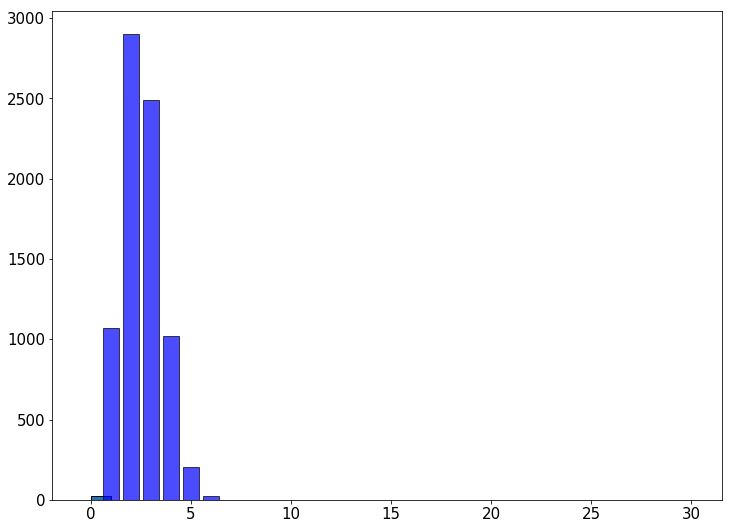

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9)) # 新しい図を作成する
plt.tick_params(labelsize=15)

half = 30
halfY = np.zeros(half, dtype=int)

for i in range(half):
    halfY[i] = countY[i]

plt.hist(halfY, range=(0,30), bins=30, edgecolor="black")

alphab = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
         '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
         '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']

pos = np.arange(len(halfY))
width = 0.8     # gives histogram aspect to the bar diagram

plt.xticks([0,5,10,15,20,25,30]) 
plt.bar(pos, halfY, width, color='b', edgecolor="black", alpha=0.7)

plt.show()